<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2789 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2502 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB

 ph                 487
Hardness             0
Solids               0
Chloramines          0
Sulfate            774
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

 ph                 0
Hardness           0


C:\Users\ABHISHEK KUMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ABHISHEK KUMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ABHISHEK KUMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstanc

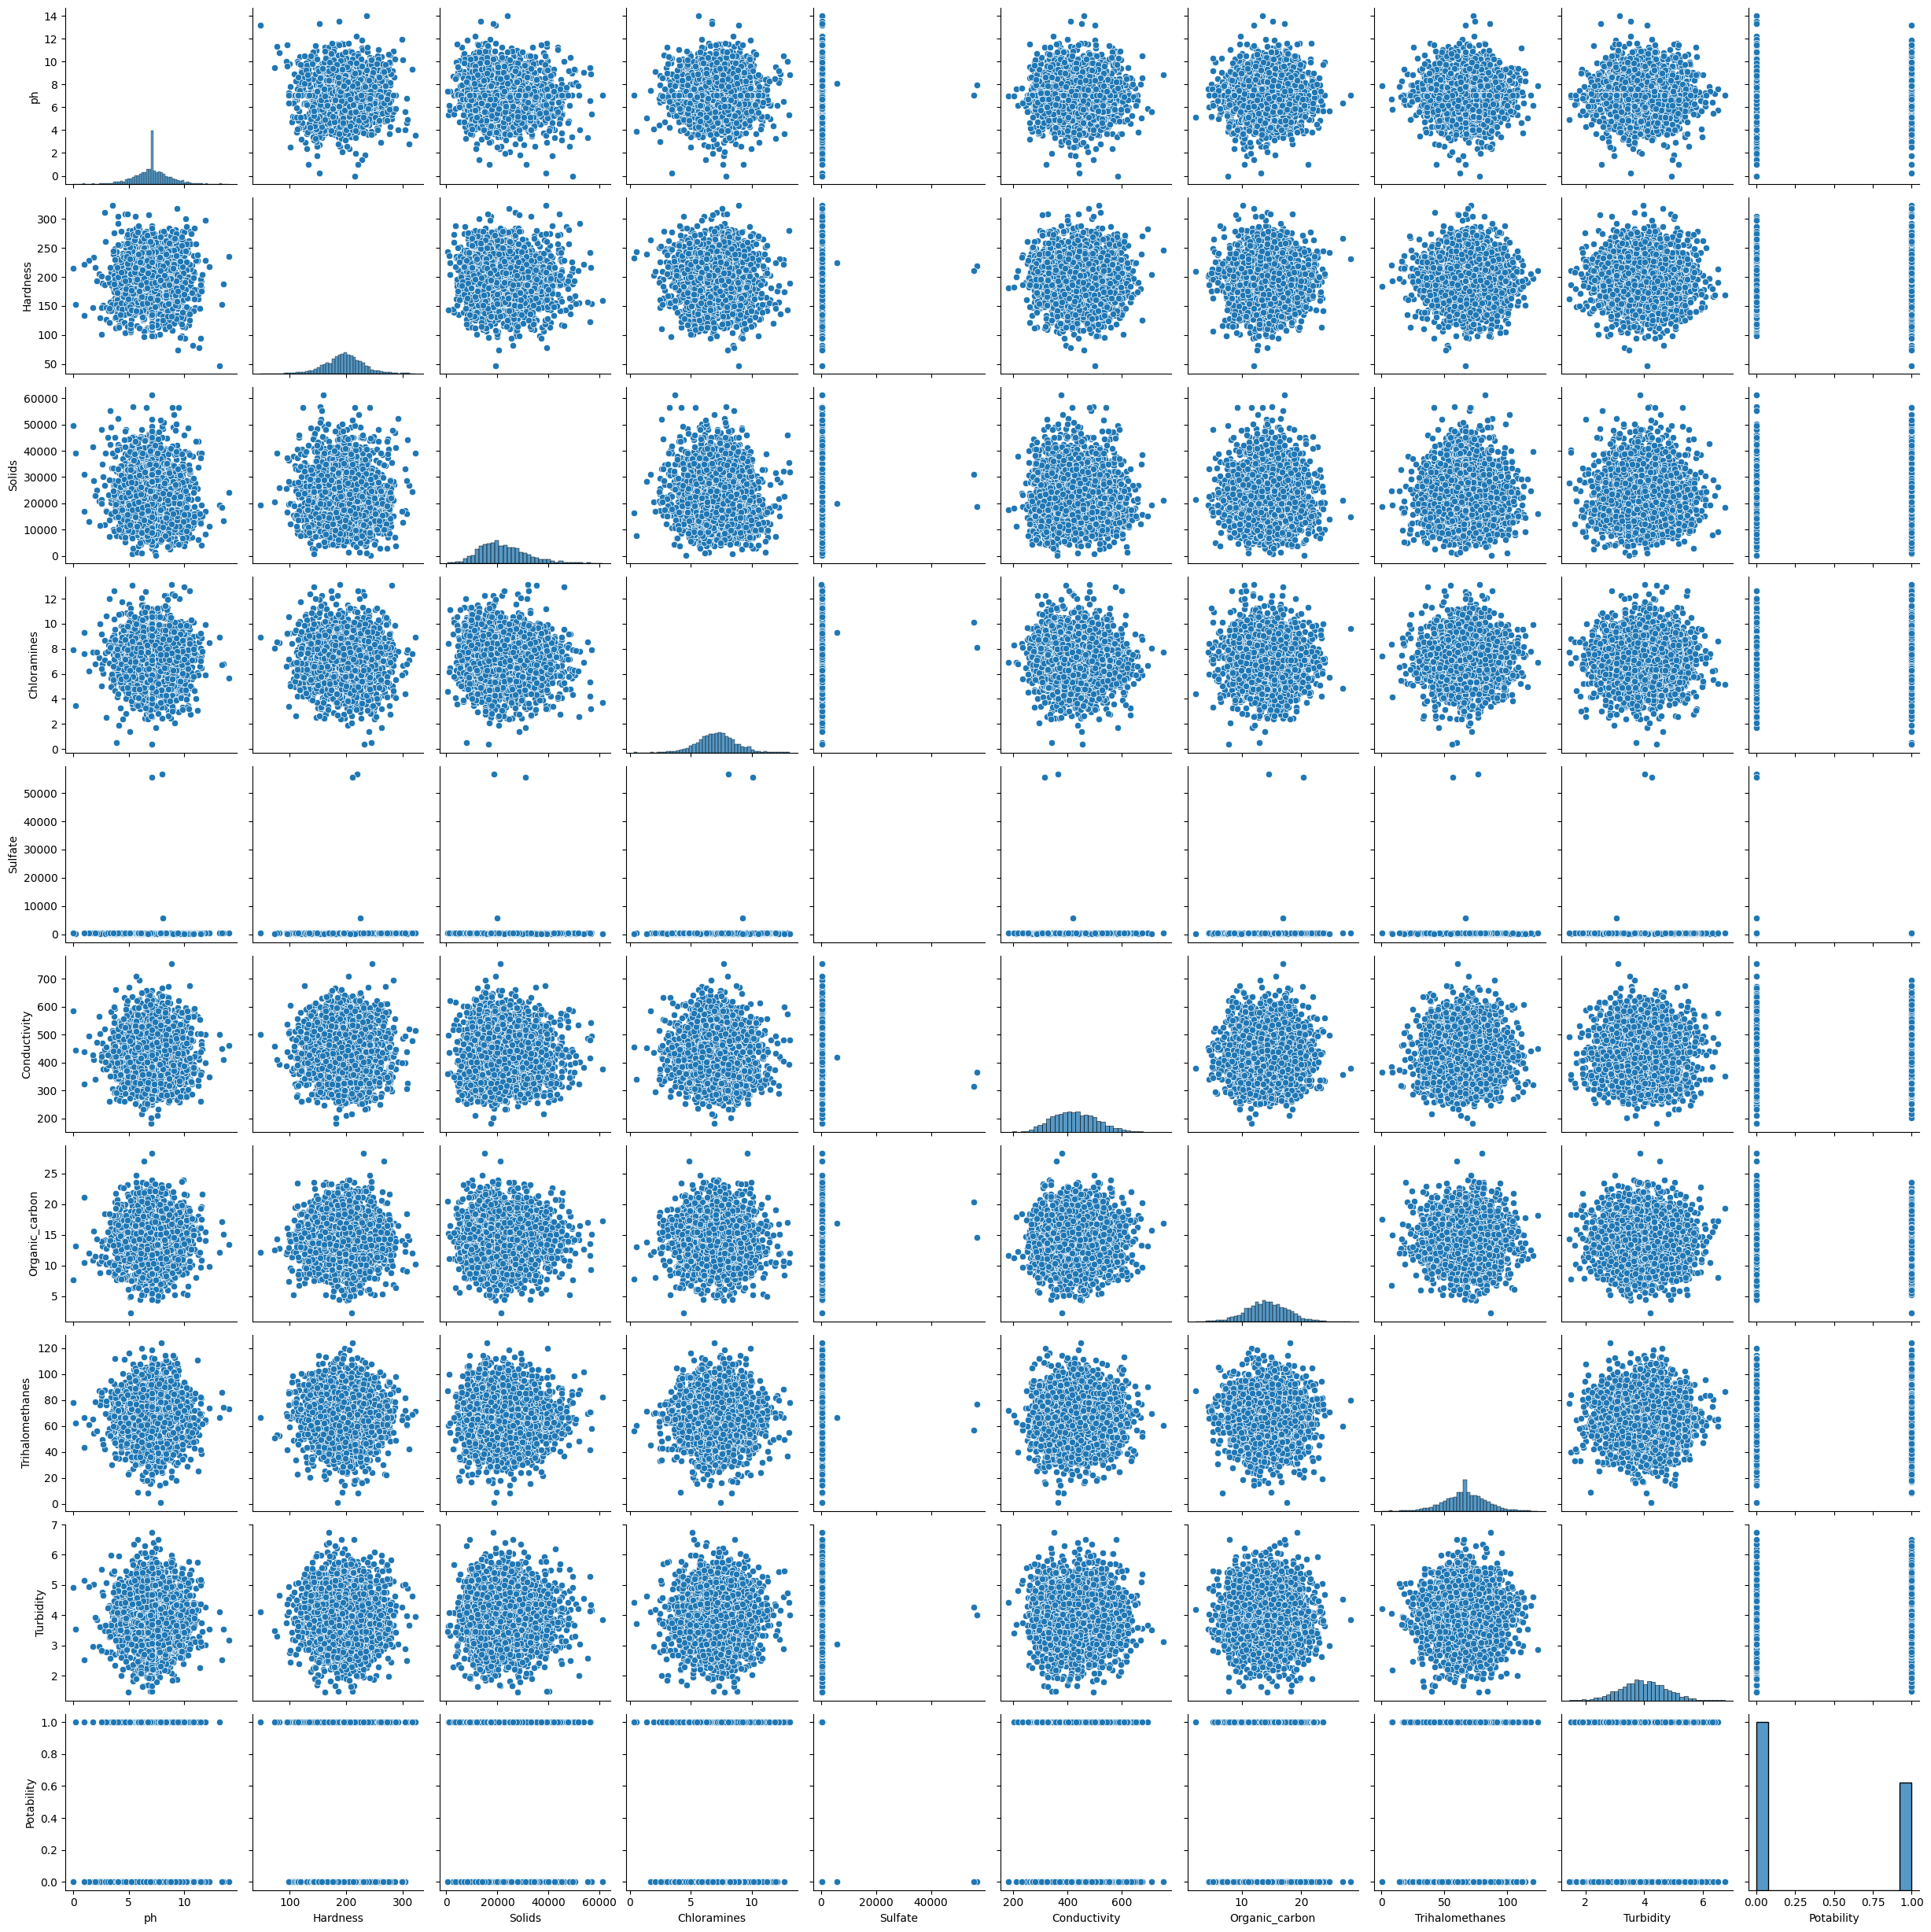

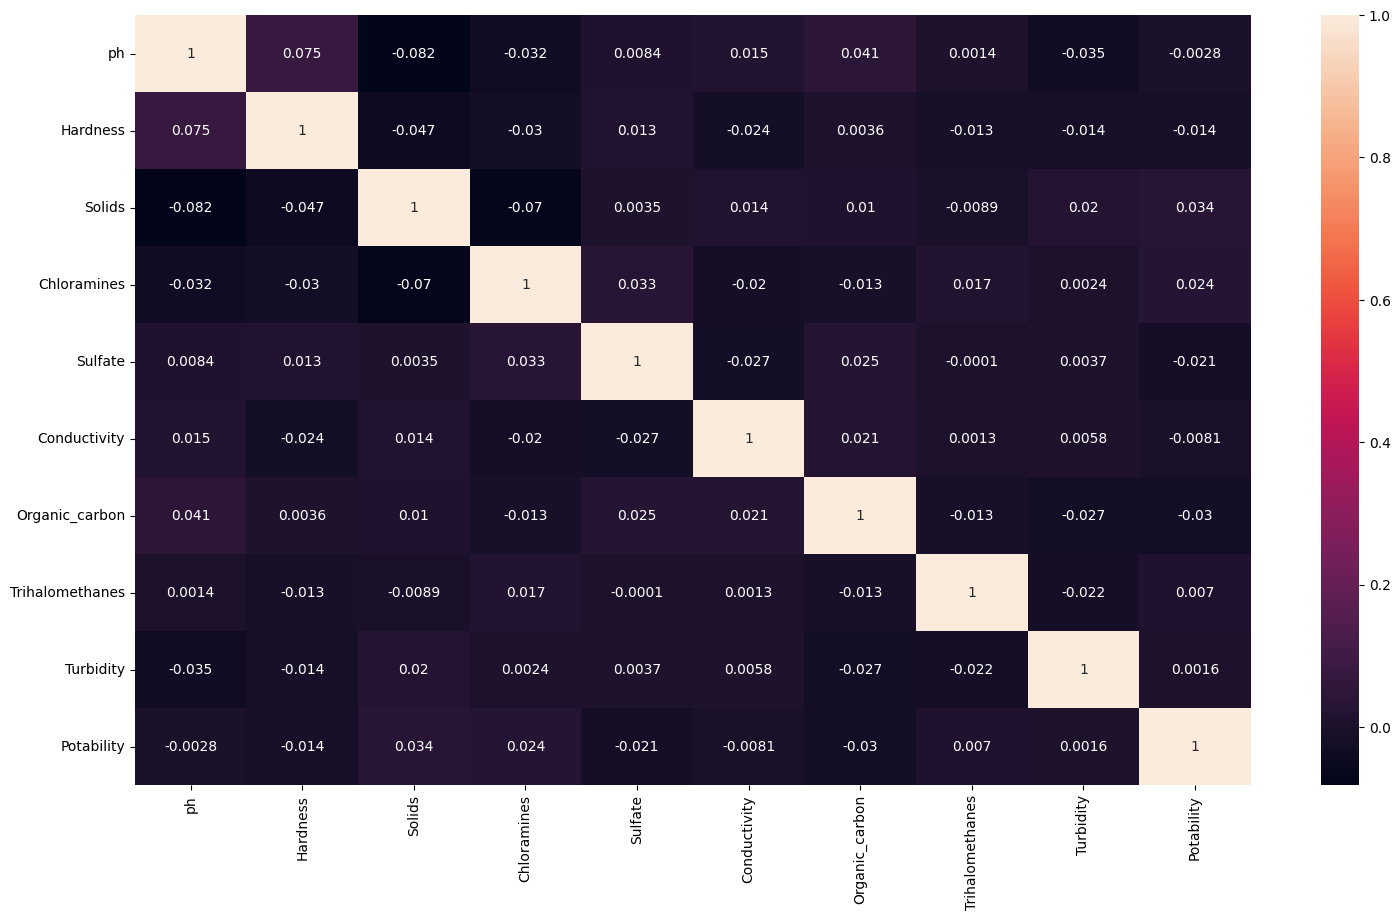

In [1]:
import pandas as p
import seaborn as s
import matplotlib.pyplot as m

da=p.read_csv("C:\\Users\\ABHISHEK KUMAR\\Downloads\\water_potability.csv")
da.info()
print("\n",da.isna().sum())

da['ph'].fillna(da["ph"].mean(),inplace=True)
da['Sulfate'].fillna(da['Sulfate'].mean(),inplace=True)
da['Trihalomethanes'].fillna(da['Trihalomethanes'].mean(),inplace=True)
print("\n",da.isna().sum())

s.pairplot(data=da)
m.show()

m.figure(figsize=(18,10))
s.heatmap(data=da.corr(),annot=True)
m.show()


Accuracy Score: 0.5929878048780488


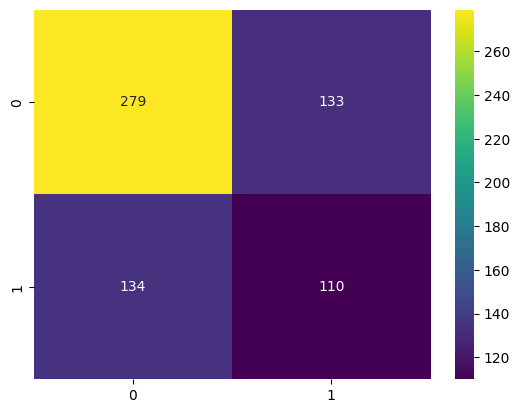

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix

x=da.drop('Potability',axis=1)
y=da['Potability']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

mod=DecisionTreeClassifier()
mod.fit(x_train,y_train)
y_pred=mod.predict(x_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
s.heatmap(data=cm,annot=True,fmt='d',cmap='viridis')
m.show()